## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.203629  0.443776  0.651283  1.309577  1.647837  0.772565
1  0.965789 -0.263234  0.858601  0.683237  0.496425  1.544894
2 -1.161420  1.417632  1.413547 -1.668346  1.451983 -0.324792
3 -0.768723 -0.471296  1.160760  0.601334  0.805904  0.533542
4  0.178899 -1.030505  1.030705  0.481139  1.301892  0.677892


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0000735	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9913666	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9804813	total: 59ms	remaining: 19.6s
3:	learn: 0.9713194	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9628745	total: 60.1ms	remaining: 12s
5:	learn: 0.9523992	total: 60.6ms	remaining: 10s
6:	learn: 0.9408254	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9299487	total: 61.6ms	remaining: 7.64s
8:	learn: 0.9216815	total: 62.2ms	remaining: 6.85s
9:	learn: 0.9146451	total: 62.8ms	remaining: 6.21s
10:	learn: 0.9065461	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8985383	total: 64ms	remaining: 5.26s
12:	learn: 0.8909021	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8836132	total: 64.8ms	remaining: 4.57s
14:	learn: 0.8762198	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8682487	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8600548	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8530954	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8442388	total: 67.1ms	remaining: 3.46s
1

48:	learn: 0.6487902	total: 81ms	remaining: 1.57s
49:	learn: 0.6424775	total: 81.7ms	remaining: 1.55s
50:	learn: 0.6374329	total: 82.4ms	remaining: 1.53s
51:	learn: 0.6318117	total: 82.8ms	remaining: 1.51s
52:	learn: 0.6257774	total: 83.4ms	remaining: 1.49s
53:	learn: 0.6206343	total: 84.1ms	remaining: 1.47s
54:	learn: 0.6147869	total: 84.7ms	remaining: 1.45s
55:	learn: 0.6108297	total: 85.1ms	remaining: 1.43s
56:	learn: 0.6060019	total: 85.5ms	remaining: 1.42s
57:	learn: 0.6013096	total: 86.1ms	remaining: 1.4s
58:	learn: 0.5974602	total: 86.6ms	remaining: 1.38s
59:	learn: 0.5922505	total: 87.1ms	remaining: 1.36s
60:	learn: 0.5878134	total: 87.5ms	remaining: 1.35s
61:	learn: 0.5828913	total: 88ms	remaining: 1.33s
62:	learn: 0.5775139	total: 88.3ms	remaining: 1.31s
63:	learn: 0.5722332	total: 88.8ms	remaining: 1.3s
64:	learn: 0.5666834	total: 89.3ms	remaining: 1.28s
65:	learn: 0.5618396	total: 89.7ms	remaining: 1.27s
66:	learn: 0.5572946	total: 90.3ms	remaining: 1.26s
67:	learn: 0.55286

195:	learn: 0.2343752	total: 155ms	remaining: 635ms
196:	learn: 0.2327945	total: 156ms	remaining: 635ms
197:	learn: 0.2313170	total: 156ms	remaining: 633ms
198:	learn: 0.2299801	total: 157ms	remaining: 632ms
199:	learn: 0.2286163	total: 158ms	remaining: 632ms
200:	learn: 0.2273076	total: 159ms	remaining: 631ms
201:	learn: 0.2258378	total: 159ms	remaining: 629ms
202:	learn: 0.2245538	total: 160ms	remaining: 627ms
203:	learn: 0.2234243	total: 161ms	remaining: 627ms
204:	learn: 0.2219900	total: 161ms	remaining: 626ms
205:	learn: 0.2207240	total: 162ms	remaining: 625ms
206:	learn: 0.2194380	total: 163ms	remaining: 624ms
207:	learn: 0.2178317	total: 163ms	remaining: 622ms
208:	learn: 0.2165798	total: 164ms	remaining: 622ms
209:	learn: 0.2150905	total: 166ms	remaining: 623ms
210:	learn: 0.2138679	total: 167ms	remaining: 623ms
211:	learn: 0.2127280	total: 167ms	remaining: 621ms
212:	learn: 0.2115218	total: 168ms	remaining: 619ms
213:	learn: 0.2102778	total: 168ms	remaining: 618ms
214:	learn: 

349:	learn: 0.0944842	total: 239ms	remaining: 444ms
350:	learn: 0.0938658	total: 240ms	remaining: 444ms
351:	learn: 0.0931992	total: 240ms	remaining: 442ms
352:	learn: 0.0929490	total: 241ms	remaining: 442ms
353:	learn: 0.0927403	total: 242ms	remaining: 441ms
354:	learn: 0.0920892	total: 242ms	remaining: 440ms
355:	learn: 0.0916718	total: 243ms	remaining: 440ms
356:	learn: 0.0914032	total: 244ms	remaining: 439ms
357:	learn: 0.0907685	total: 244ms	remaining: 438ms
358:	learn: 0.0905691	total: 245ms	remaining: 437ms
359:	learn: 0.0903096	total: 245ms	remaining: 436ms
360:	learn: 0.0899390	total: 246ms	remaining: 435ms
361:	learn: 0.0896798	total: 247ms	remaining: 434ms
362:	learn: 0.0894905	total: 247ms	remaining: 434ms
363:	learn: 0.0889000	total: 248ms	remaining: 433ms
364:	learn: 0.0886397	total: 248ms	remaining: 432ms
365:	learn: 0.0880469	total: 249ms	remaining: 431ms
366:	learn: 0.0878477	total: 249ms	remaining: 430ms
367:	learn: 0.0874955	total: 250ms	remaining: 429ms
368:	learn: 

469:	learn: 0.0498742	total: 305ms	remaining: 344ms
470:	learn: 0.0496311	total: 306ms	remaining: 344ms
471:	learn: 0.0494092	total: 307ms	remaining: 343ms
472:	learn: 0.0491897	total: 308ms	remaining: 343ms
473:	learn: 0.0490033	total: 308ms	remaining: 342ms
474:	learn: 0.0487640	total: 309ms	remaining: 341ms
475:	learn: 0.0485539	total: 309ms	remaining: 341ms
476:	learn: 0.0483221	total: 310ms	remaining: 340ms
477:	learn: 0.0480912	total: 310ms	remaining: 339ms
478:	learn: 0.0479247	total: 311ms	remaining: 338ms
479:	learn: 0.0476995	total: 311ms	remaining: 337ms
480:	learn: 0.0475519	total: 312ms	remaining: 337ms
481:	learn: 0.0473299	total: 313ms	remaining: 336ms
482:	learn: 0.0472056	total: 313ms	remaining: 335ms
483:	learn: 0.0469129	total: 314ms	remaining: 335ms
484:	learn: 0.0467207	total: 315ms	remaining: 334ms
485:	learn: 0.0465264	total: 315ms	remaining: 333ms
486:	learn: 0.0463112	total: 316ms	remaining: 333ms
487:	learn: 0.0460970	total: 316ms	remaining: 332ms
488:	learn: 

531:	learn: 0.0379884	total: 345ms	remaining: 304ms
532:	learn: 0.0378022	total: 346ms	remaining: 303ms
533:	learn: 0.0376684	total: 346ms	remaining: 302ms
534:	learn: 0.0374863	total: 347ms	remaining: 301ms
535:	learn: 0.0373480	total: 348ms	remaining: 301ms
536:	learn: 0.0372267	total: 348ms	remaining: 300ms
537:	learn: 0.0370896	total: 349ms	remaining: 299ms
538:	learn: 0.0369452	total: 349ms	remaining: 299ms
539:	learn: 0.0367687	total: 349ms	remaining: 298ms
540:	learn: 0.0366244	total: 350ms	remaining: 297ms
541:	learn: 0.0364900	total: 350ms	remaining: 296ms
542:	learn: 0.0363753	total: 351ms	remaining: 295ms
543:	learn: 0.0362738	total: 351ms	remaining: 294ms
544:	learn: 0.0361500	total: 351ms	remaining: 293ms
545:	learn: 0.0359554	total: 352ms	remaining: 292ms
546:	learn: 0.0358813	total: 352ms	remaining: 292ms
547:	learn: 0.0357522	total: 353ms	remaining: 291ms
548:	learn: 0.0356302	total: 363ms	remaining: 298ms
549:	learn: 0.0354513	total: 364ms	remaining: 297ms
550:	learn: 

637:	learn: 0.0250525	total: 428ms	remaining: 243ms
638:	learn: 0.0249619	total: 429ms	remaining: 242ms
639:	learn: 0.0248929	total: 430ms	remaining: 242ms
640:	learn: 0.0248174	total: 431ms	remaining: 241ms
641:	learn: 0.0247141	total: 431ms	remaining: 240ms
642:	learn: 0.0246293	total: 432ms	remaining: 240ms
643:	learn: 0.0245514	total: 432ms	remaining: 239ms
644:	learn: 0.0244773	total: 433ms	remaining: 238ms
645:	learn: 0.0244130	total: 433ms	remaining: 237ms
646:	learn: 0.0243724	total: 434ms	remaining: 237ms
647:	learn: 0.0243203	total: 434ms	remaining: 236ms
648:	learn: 0.0242484	total: 435ms	remaining: 235ms
649:	learn: 0.0241488	total: 435ms	remaining: 234ms
650:	learn: 0.0241091	total: 436ms	remaining: 234ms
651:	learn: 0.0239986	total: 436ms	remaining: 233ms
652:	learn: 0.0239597	total: 437ms	remaining: 232ms
653:	learn: 0.0238325	total: 437ms	remaining: 231ms
654:	learn: 0.0237360	total: 438ms	remaining: 231ms
655:	learn: 0.0236651	total: 438ms	remaining: 230ms
656:	learn: 

820:	learn: 0.0134532	total: 528ms	remaining: 115ms
821:	learn: 0.0134130	total: 529ms	remaining: 115ms
822:	learn: 0.0134001	total: 530ms	remaining: 114ms
823:	learn: 0.0133307	total: 530ms	remaining: 113ms
824:	learn: 0.0132651	total: 531ms	remaining: 113ms
825:	learn: 0.0132015	total: 531ms	remaining: 112ms
826:	learn: 0.0131449	total: 532ms	remaining: 111ms
827:	learn: 0.0130829	total: 532ms	remaining: 111ms
828:	learn: 0.0130195	total: 533ms	remaining: 110ms
829:	learn: 0.0129588	total: 534ms	remaining: 109ms
830:	learn: 0.0128992	total: 534ms	remaining: 109ms
831:	learn: 0.0128611	total: 535ms	remaining: 108ms
832:	learn: 0.0127978	total: 535ms	remaining: 107ms
833:	learn: 0.0127311	total: 536ms	remaining: 107ms
834:	learn: 0.0126937	total: 537ms	remaining: 106ms
835:	learn: 0.0126569	total: 538ms	remaining: 105ms
836:	learn: 0.0125942	total: 539ms	remaining: 105ms
837:	learn: 0.0125042	total: 539ms	remaining: 104ms
838:	learn: 0.0124447	total: 540ms	remaining: 104ms
839:	learn: 

946:	learn: 0.0089807	total: 605ms	remaining: 33.9ms
947:	learn: 0.0089432	total: 605ms	remaining: 33.2ms
948:	learn: 0.0089235	total: 606ms	remaining: 32.6ms
949:	learn: 0.0088853	total: 607ms	remaining: 31.9ms
950:	learn: 0.0088506	total: 608ms	remaining: 31.3ms
951:	learn: 0.0088195	total: 608ms	remaining: 30.7ms
952:	learn: 0.0087919	total: 609ms	remaining: 30ms
953:	learn: 0.0087648	total: 609ms	remaining: 29.4ms
954:	learn: 0.0087459	total: 609ms	remaining: 28.7ms
955:	learn: 0.0087105	total: 610ms	remaining: 28.1ms
956:	learn: 0.0086839	total: 610ms	remaining: 27.4ms
957:	learn: 0.0086577	total: 610ms	remaining: 26.8ms
958:	learn: 0.0086349	total: 611ms	remaining: 26.1ms
959:	learn: 0.0086092	total: 611ms	remaining: 25.5ms
960:	learn: 0.0085868	total: 612ms	remaining: 24.8ms
961:	learn: 0.0085410	total: 612ms	remaining: 24.2ms
962:	learn: 0.0085006	total: 612ms	remaining: 23.5ms
963:	learn: 0.0084610	total: 613ms	remaining: 22.9ms
964:	learn: 0.0084266	total: 613ms	remaining: 22

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

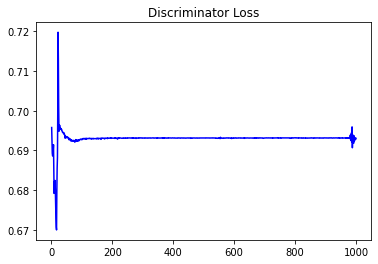

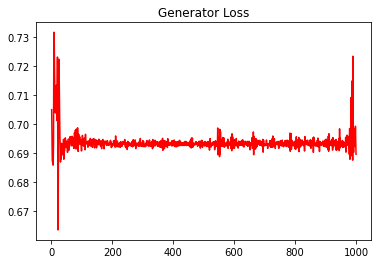

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12476808485757765


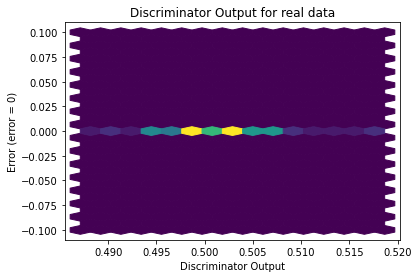

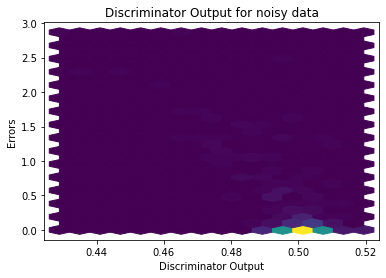

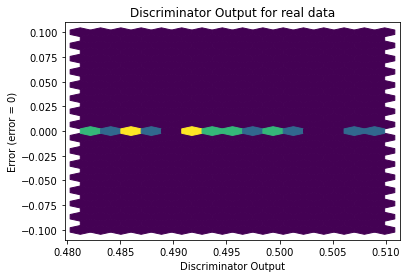

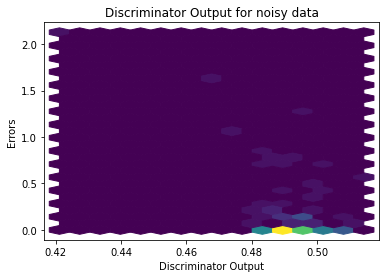

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


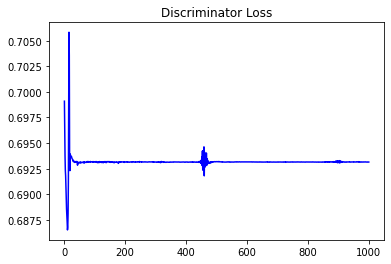

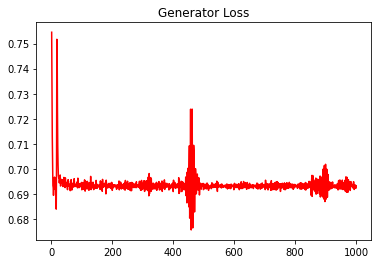

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13373107820916794


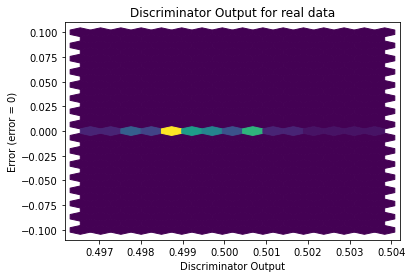

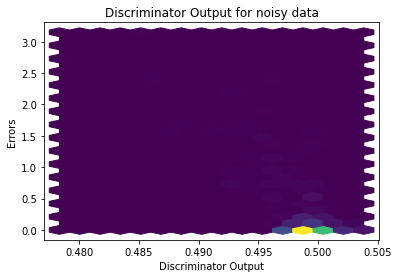

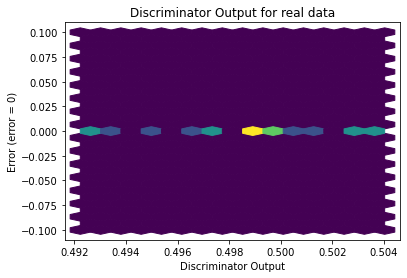

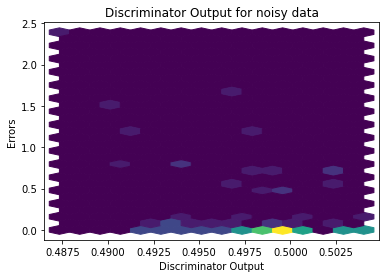

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4322]], requires_grad=True)
